In [ ]:
"""
%pip install qiskit qiskit-ibm-runtime
%pip install qiskit
%pip install qiskit[visualization]
%pip install pylatexenc
%pip install qiskit qiskit-aer --upgrade
"""

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 74.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=2dc25ae0a547fac64edea6699d21fa21c6714159f0f1671a3856272f0aae8c06
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import numpy as np
from qiskit_aer import Aer
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Operator
# import basic plot tools
from qiskit.visualization import plot_histogram


In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)


circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

# Oracle, c = 11
circuit.cx(qr[0], qr[2])
circuit.cx(qr[1], qr[2])
circuit.cx(qr[0], qr[3])
circuit.cx(qr[1], qr[3])

circuit.barrier()


circuit.measure(qr[2], cr[2])
circuit.measure(qr[3], cr[3])

circuit.barrier()


circuit.h(qr[0])
circuit.h(qr[1])

circuit.barrier()

circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])


circuit.draw()

┌───┐ ░                      ░        ░ ┌───┐ ░ ┌─┐   
q0_0: ┤ H ├─░───■─────────■────────░────────░─┤ H ├─░─┤M├───
      ├───┤ ░   │         │        ░        ░ ├───┤ ░ └╥┘┌─┐
q0_1: ┤ H ├─░───┼────■────┼────■───░────────░─┤ H ├─░──╫─┤M├
      └───┘ ░ ┌─┴─┐┌─┴─┐  │    │   ░ ┌─┐    ░ └───┘ ░  ║ └╥┘
q0_2: ──────░─┤ X ├┤ X ├──┼────┼───░─┤M├────░───────░──╫──╫─
            ░ └───┘└───┘┌─┴─┐┌─┴─┐ ░ └╥┘┌─┐ ░       ░  ║  ║ 
q0_3: ──────░───────────┤ X ├┤ X ├─░──╫─┤M├─░───────░──╫──╫─
            ░           └───┘└───┘ ░  ║ └╥┘ ░       ░  ║  ║ 
c0: 4/════════════════════════════════╩══╩═════════════╩══╩═
                                      2  3             0  1

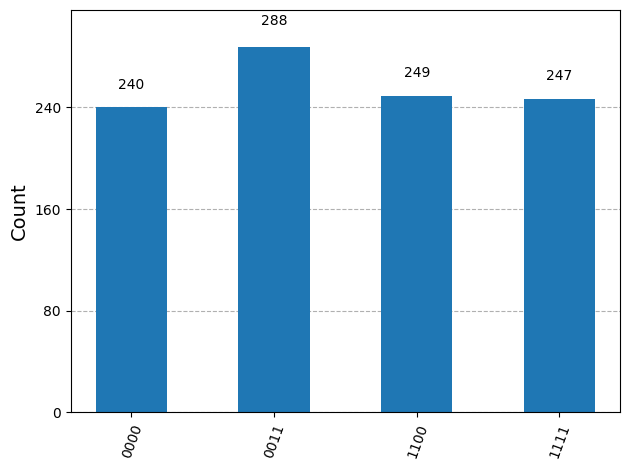

In [11]:
from qiskit_aer import AerSimulator
shots = 1024
result = AerSimulator().run(circuit, shots=shots, memory=True).result()
answer=result.get_counts()
plot_histogram(answer)


#counts = results.get_counts()
#plot_histogram(counts)

In [13]:
print(answer)

{'0000': 240, '1100': 249, '1111': 247, '0011': 288}


In [27]:
def dotproduct(c, z):
    accum = 0
    for i in range(len(c)):
        accum += int(c[i]) * int(z[i])
    return (accum % 2)

In [29]:
c='1100' # try with 1101
for z in answer:
    print( '{}.{} = {} (mod 2)'.format(c, z, dotproduct(c,z)) )

1101.0000 = 0 (mod 2)
1101.1100 = 0 (mod 2)
1101.1111 = 1 (mod 2)
1101.0011 = 1 (mod 2)


In [16]:
# Second oracle with n=3

qr = QuantumRegister(6)
cr = ClassicalRegister(6)
circuit = QuantumCircuit(qr, cr)


c = '101'
n = len(c)

q_reg1 = QuantumRegister (n,'reg1')
q_reg2 = QuantumRegister (n,'reg2')
c_reg = ClassicalRegister (n)
circuit = QuantumCircuit (q_reg1, q_reg2, c_reg)

circuit.h(q_reg1)
circuit.barrier()

circuit.cx(q_reg1, q_reg2)
circuit.barrier()

circuit.cx(q_reg1[0],q_reg2[0])
circuit.cx(q_reg1[0],q_reg2[2])
circuit.barrier()

circuit.measure(q_reg2,c_reg)

circuit.h(q_reg1)
circuit.barrier()

circuit.measure(q_reg1, c_reg)

circuit.draw()

┌───┐ ░                 ░            ░ ┌───┐       ░ ┌─┐      
reg1_0: ┤ H ├─░───■─────────────░───■────■───░─┤ H ├───────░─┤M├──────
        ├───┤ ░   │             ░   │    │   ░ ├───┤       ░ └╥┘┌─┐   
reg1_1: ┤ H ├─░───┼────■────────░───┼────┼───░─┤ H ├───────░──╫─┤M├───
        ├───┤ ░   │    │        ░   │    │   ░ ├───┤       ░  ║ └╥┘┌─┐
reg1_2: ┤ H ├─░───┼────┼────■───░───┼────┼───░─┤ H ├───────░──╫──╫─┤M├
        └───┘ ░ ┌─┴─┐  │    │   ░ ┌─┴─┐  │   ░ └┬─┬┘       ░  ║  ║ └╥┘
reg2_0: ──────░─┤ X ├──┼────┼───░─┤ X ├──┼───░──┤M├────────░──╫──╫──╫─
              ░ └───┘┌─┴─┐  │   ░ └───┘  │   ░  └╥┘ ┌─┐    ░  ║  ║  ║ 
reg2_1: ──────░──────┤ X ├──┼───░────────┼───░───╫──┤M├────░──╫──╫──╫─
              ░      └───┘┌─┴─┐ ░      ┌─┴─┐ ░   ║  └╥┘┌─┐ ░  ║  ║  ║ 
reg2_2: ──────░───────────┤ X ├─░──────┤ X ├─░───╫───╫─┤M├─░──╫──╫──╫─
              ░           └───┘ ░      └───┘ ░   ║   ║ └╥┘ ░  ║  ║  ║ 
  c2: 3/═════════════════════════════════════════╩═══╩══╩═════╩══╩══╩═
                                                 0   1  2     0  1  2

In [20]:
def simon_oracle(b):
    # bitstring b as input period
    b = b[::-1] # reverse
    n = len(b)
    qc = QuantumCircuit(n*2)

    for q in range(n):
        qc.cx(q, q+n)
    if '1' not in b:
        return qc
    i = b.find('1') # index of first non-zero bit in b

    for q in range(n):
        if b[q] == '1':
            qc.cx(i, (q)+n)
    return qc